# Übung: Reproduzierbarkeit Nationaler Bildungsbericht

In dem vorangegangenen Kapitel wurden Sie  mit ersten Grundbausteinen im Arbeiten mit **R** vertraut gemacht.  Diese Fähigkeiten können Sie nutzen, um die *Reproduzierbarkeit* von Grafiken, Daten, etc. zu überprüfen.

`````{admonition} Doch was genau ist eigentlich Reproduzierbarkeit?
:class: tip
Der Begriff Reproduzierbarkeit umschreibt in der Wissenschaft die Möglichkeit, durch Verwenden der gleichen Ausgangsdaten und Auswertungsmethoden auf die gleichen Ergebnisse zu produzieren {cite}`noauthor_reproducibility_2019`.
`````


## Fallbeispiel: Bildungsbericht

Im nationalen [Bildungsbericht 2022](https://www.bildungsbericht.de/de/bildungsberichte-seit-2006/bildungsbericht-2022)
befindet sich auf der Seite 259 folgende Abbildung:

![](https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/_images/Abb_H1-3.png)  
*Abbildung 8: Abb.H1-3 aus dem Nationalen Bildungsbericht*

Wenn Sie nun das Kreisdiagramm für *"Hochschulen insgesamt"* und *"Personen"* auf Reproduzierbarkeit überprüfen möchten, benötigen Sie hierfür die Daten aus der Primärquelle. Hierzu müssen Sie nun selbst recherchieren und versuchen, die Ausgangsdaten zu finden.

```{admonition} Achtung!
Der Bildungsbericht verweist auf einzelne Excel-Dateien als Datenbasis (Hier: "Tab. H1-9web"), welche gleichzeitig mit dem Bildungsbericht veröffenlticht werden. Eine gute wissenschaftliche Praxis verlangt jedoch, dass Sie die jeweilige Primärquelle verwenden und nicht die verlinkten Sekundärquellen.

### Primärquelle finden

Unter der Grafik sind als Quelle unter anderem die "Statistische[n] Ämter des Bundes und der Länder" angegeben. Nun können Sie nachschauen, ob Sie auf der [Website des Statistischen Bundesamtes](https://www-genesis.destatis.de/genesis/online) (auch DESTATIS genannt) die Datenbasis zu dem vorliegendem Kreisdiagramm finden können.

**Übung:**\
Finden Sie die Datengrundlage für das obere linke Kreisdiagramm (Personen, Hochschulen insgesamt) auf der Website des des Statistischen Bundesamtes.

*Gefunden?*
<details>
<summary>Ja</summary>
<br>
Bravo, gut gemacht!
Downloaden Sie nun die Daten für das Jahr 2020 als CSV-Datei ab, da sich das Kreisdiagramm nur auf dieses Jahr bezieht.
</details>



<details>
<summary>Nein</summary>
<br>
Halb so schlimm, die Daten sind auch etwas versteckt. Klicken Sie in folgender Reihenfolge auf besagte Kacheln:

1. "2 Bildung, Sozialleistungen, Gesundheit, Recht"

2. "21 Bildung und Kultur, Forschung und Entwicklung"

3. "21341 Statistik des Hochschulpersonals"

4. "21341-0001	Personal an Hochschulen: Deutschland, Jahre, Personalgruppen nach Beschäftigungsverhältnis, Geschlecht"

Hier können Sie nun das Jahr 2020 auswählen, auf dass das Kreisdiagramm verweist und die Daten als CSV-Datei downloaden.
</details>

Öffnen Sie nun die Datei in einem Programm Ihrer Wahl (z.B. Excel).
Wie Sie nun vermutlich selber erkannt haben, handelt es sich bei dieser Datei um die CSV-Ausgangsdatei aus vorangegangener Lerneinheit [Übung: Arbeiten mit CSV-Dateien in R](Übung_csv).

### Nachbauen des Kreisdiagramms in R
Das nachfolgende Skript knüpft an die vorangegangene Übung an. Es wird vorausgesetzt das die Daten entsprechend des Skriptes angepasst wurden.
Ihre Tabellendaten sollten wie folgt aussehen: (This function does not work unless you load the Tabellendaten dataframe from the last Exercise.)


In [95]:
# First replace all ae, oe, ue, ss to ä", ö, ü, ß
Tabellendaten$Angestelltenverhaeltnis <- str_replace_all(Tabellendaten$Angestelltenverhaeltnis, c("ae" = "ä", "oe" =  "ö", "ue" = "ü" ))
Tabellendaten$Geschlecht <- str_replace_all(Tabellendaten$Geschlecht, c("ae" = "ä", "oe" =  "ö", "ue" = "ü" ))
Tabellendaten$Personalkategorie <- str_replace_all(Tabellendaten$Personalkategorie, c("ae" = "ä", "oe" =  "ö", "ue" = "ü" ))
Tabellendaten$Art_der_Anstellung <- str_replace_all(Tabellendaten$Art_der_Anstellung, c("ae" = "ä", "oe" =  "ö", "ue" = "ü" ))
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis, which = c("left"))
#Tabellendaten

In [96]:
head(Tabellendaten)

,Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
,<chr>,<chr>,<int>,<chr>,<chr>
1,Wissenschaftliches und künstlerisches Personal,männlich,247720,Wissenschaftliches und künstlerisches Personal,Insgesamt
2,Wissenschaftliches und künstlerisches Personal,weiblich,167112,Wissenschaftliches und künstlerisches Personal,Insgesamt
3,Wissenschaftliches und künstlerisches Personal,Insgesamt,414832,Wissenschaftliches und künstlerisches Personal,Insgesamt
4,Hauptberufl. wissenschaftl. u. künstler. Personal,männlich,159567,Wissenschaftliches und künstlerisches Personal,Hauptberuflich
5,Hauptberufl. wissenschaftl. u. künstler. Personal,weiblich,109708,Wissenschaftliches und künstlerisches Personal,Hauptberuflich
6,Hauptberufl. wissenschaftl. u. künstler. Personal,Insgesamt,269275,Wissenschaftliches und künstlerisches Personal,Hauptberuflich


Falls Sie die R-Session neu beginnen, sollten Sie wieder für diese Übung das `tidyverse`-Package laden.

In [97]:
library(tidyverse)

#### Aufbau des Kreisdiagramms

![](https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/_images/Abb_H1-3_fokus.png)  
*Abbildung 9: Abb.H1-3 aus dem Nationalen Bildungsbericht*

Um das Kreisdiagramm reproduzieren zu können, müssen Sie zunächst die einzelnen Bestandteile verstehen.
Das Diagramm unterteilt in die folgenden drei Personalgruppen:

- Professor:innen
- Wissenschaftliche und künstlerische Mitarbeiter:innen
- Nebenberufliche Mitarbeiter:innen

Zu diesen Personalgruppen werden jeweils die absoluten Beschäftigungszahlen und der jeweilige prozentuale Anteile zur Gesamtsumme für das Jahr 2020
angegeben.

*Lesebeispiel: Im Jahr 2020 waren insgesamt 49.293 Professor:innen an Universitäten und Fachhochschulen in Deutschland angestellt.*


#### Einzelne Datenwerte finden
Zur eigenständigen Erstellung des Kreisdiagramms müssen Sie nun die absoluten Beschäftigungszahlen in Ihren Tabellendaten finden.
Hierzu bietet sich das Suchen mittels der `filter()`-Funktion an, welche zum Ende der letzten Übung thematisiert wurde.

Filtern nach Professoren:

In [98]:
filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
<chr>,<chr>,<int>,<chr>,<chr>
Professoren,Insgesamt,49293,Wissenschaftliches und künstlerisches Personal,Hauptberuflich


In [99]:
##  Angestelltenverhaeltnis Geschlecht Angestelltenzahl_2020                              Personalkategorie Art_der_Anstellung
## 1             Professoren  Insgesamt                 49293 Wissenschaftliches und künstlerisches Personal     Hauptberuflich

Wie Sie erkennen können, stimmt die Angestelltenzahl von 49293 mit der aus dem Kreisdiagramm überein.
Diese Ausgabe können Sie sich nun abspeichern.

In [100]:
Professoren_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

Für Nebenberufliche Mitarbeiter:innen gehen Sie analog vor:

In [102]:
Nebenberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Nebenberufl. wissenschaftl. u. künstler. Personal" & Tabellendaten$Geschlecht == "Insgesamt")

#Wert anzeigen lassen
Nebenberuflich_Insgesamt

Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
<chr>,<chr>,<int>,<chr>,<chr>
Nebenberufl. wissenschaftl. u. künstler. Personal,Insgesamt,145557,Wissenschaftliches und künstlerisches Personal,Nebenberuflich


In [103]:
##                             Angestelltenverhaeltnis Geschlecht Angestelltenzahl_2020                              Personalkategorie Art_der_Anstellung
## 1 Nebenberufl. wissenschaftl. u. künstler. Personal  Insgesamt                145557 Wissenschaftliches und künstlerisches Personal     Nebenberuflich

Den Wert für "wissenschaftlichen und künstlerischen Mitarbeiter:innen" im Kreisdiagramm können Sie nicht direkt aus der Tabelle ablesen.
Sie erhalten diese Zahl indem Sie die "Professoren - Insgesamt" von  "Hauptberuflich wissenschaftliches und künstlerisches Personal - Insgesamt" abziehen, da die Professoren in der DESTATIS-Datei auch unter der Kategorie "Hauptberuflich wissenschaftliches und künstlerisches Personal" gelistet werden.

In [104]:
Professoren_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" &
                Tabellendaten$Geschlecht == "Insgesamt")

Hauptberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Hauptberufl. wissenschaftl. u. künstler. Personal" &
                                     Tabellendaten$Geschlecht == "Insgesamt")

Hauptberuflich_exlusive_Professoren <- Hauptberuflich_Insgesamt$Angestelltenzahl_2020 - Professoren_Insgesamt$Angestelltenzahl_2020

#Wert anzeigen lassen
Hauptberuflich_exlusive_Professoren

[1] 219982

In [105]:
## [1] 219982

#### Dataframe  erstellen
Sie haben nun die einzelnen Datenwerte abgespeichert. Damit Sie diese für ein Kreisdiagramm verwenden können, müssen Sie diese Werte in einem neu erstellen Dataframe kombinieren.

Hierzu erstellen Sie zunächst einen Vektor mit den passenden Bezeichnungen (Grundlage: Legende der Originalabbildung).

In [106]:
Personalgruppe <- c("Wissenschaftliche und künstlerische Mitarbeiter:innen", "Professor:innen", "Nebenberufliche Mitarbeiter:innen")

Nun erzeugen Sie einen zweiten Vektor, welcher die abgespeicherten Datenwerte zu den jeweiligen Personalgruppen enthält.\
**Achtung!:** Hier ist die richtige Reihenfolge analog zum Vektor "Arbeitsverhältnis" wichtig.

In [107]:
Absolute_Werte <- c(Hauptberuflich_exlusive_Professoren, Professoren_Insgesamt$Angestelltenzahl_2020,
                    Nebenberuflich_Insgesamt$Angestelltenzahl_2020)

Nun können Sie beide Vektoren kombinieren und einen Dataframe erstellen:

In [108]:
Daten_kreisdiagramm <- data.frame(Personalgruppe, Absolute_Werte)

#Dataframe anzeigen lassen
Daten_kreisdiagramm

Personalgruppe,Absolute_Werte
<chr>,<int>
Wissenschaftliche und künstlerische Mitarbeiter:innen,219982
Professor:innen,49293
Nebenberufliche Mitarbeiter:innen,145557


In [109]:
##                       Personalgruppe  Absolute_Werte
## 1 Wissenschaftliche und künstlerische Mitarbeiter:innen     219982
## 2                     Professor:innen      49293
## 3            Nebenberufliche Mitarbeiter:innen     145557

Der erstellte Dataframe kann nun um eine neue Variable erweitert werden, welche die Datenwerte in Prozent zum Gesamtwert anzeigt.
Hierfür können Sie sich die folgenden zwei Befehle zu nutze machen:

- Der Befehl `round()`rundet eine Zahl auf die nach dem Komma angegebene Nachkommastelle.

- Der Befehl `paste()` kombiniert zwei einzelne Objekte (z.B. Vektoren, einzelne Datenwerte, etc.). Mittels `sep =` können Sie angeben, welches Zeichen zwischen den Objekten stehen soll. Falls Sie diese Spezifikation weglassen, wird **R** ein einzelnes Leerzeichen verwenden.

In [110]:
#Varibale "Prozent" erzeugen
Daten_kreisdiagramm$Prozent <- paste(round(Daten_kreisdiagramm$Absolute_Werte/sum(Daten_kreisdiagramm$Absolute_Werte)*100,0), "%")

#Absolute Werte und Prozentwerte kombinieren
Daten_kreisdiagramm$Werte_kombiniert <- paste(Daten_kreisdiagramm$Absolute_Werte, sep = " | ", Daten_kreisdiagramm$Prozent)

#Neue Variablen begutachten
Daten_kreisdiagramm

Personalgruppe,Absolute_Werte,Prozent,Werte_kombiniert
<chr>,<int>,<chr>,<chr>
Wissenschaftliche und künstlerische Mitarbeiter:innen,219982,53 %,219982 | 53 %
Professor:innen,49293,12 %,49293 | 12 %
Nebenberufliche Mitarbeiter:innen,145557,35 %,145557 | 35 %


In [112]:
##                        Personalgruppe Absolute_Werte Prozent     Werte_kombiniert
## 1 Wissenschaftliche und künstlerische Mitarbeiter:innen     219982    53 %    219982 | 53 %
## 2                     Professor:innen      49293    12 %     49293 | 12 %
## 3            Nebenberufliche Mitarbeiter:innen     145557    35 %    145557 | 35 %

Falls Sie wie in dem originalen Kreisdiagramm Tausenderpunkte angezeigt bekommen möchten, können Sie die Funktion `prettyNum` verwenden.

In [118]:
Daten_kreisdiagramm$Werte_kombiniert <- prettyNum(Daten_kreisdiagramm$Werte_kombiniert, big.mark = ".", decimal.mark = ",")
Daten_kreisdiagramm$Arbeitsverhältnis <- Daten_kreisdiagramm$Personalgruppe

#### Visualisierung des Kreisdiagramms
Aus dem erzeugten Dataframe können Sie sich nun ein Kreisdiagramm erstellen lassen. Hierzu könnten Sie den Befehl `pie()` nutzen. Diese Funktion bietet jedoch nicht viele Anpassungsmöglichkeiten und im folgenden wird auf die weit verbreitete `ggplot`-Funktion zurückgegriffen.

Lassen Sie sich nicht von der Länge des folgenden Codes abschrecken. Jede einzelne Zeile spezifiziert den Aufbau des Kreisdiagramms. Wenn Sie weitere Details zu bestimmten Befehlen erfahren wollen, schlagen Sie diese in der R-Dokumentation nach (z.B. `?geom_label()`) oder lassen Sie mal bestimmte Zeilen weg, um nachzugucken, was sich am Output verändert.

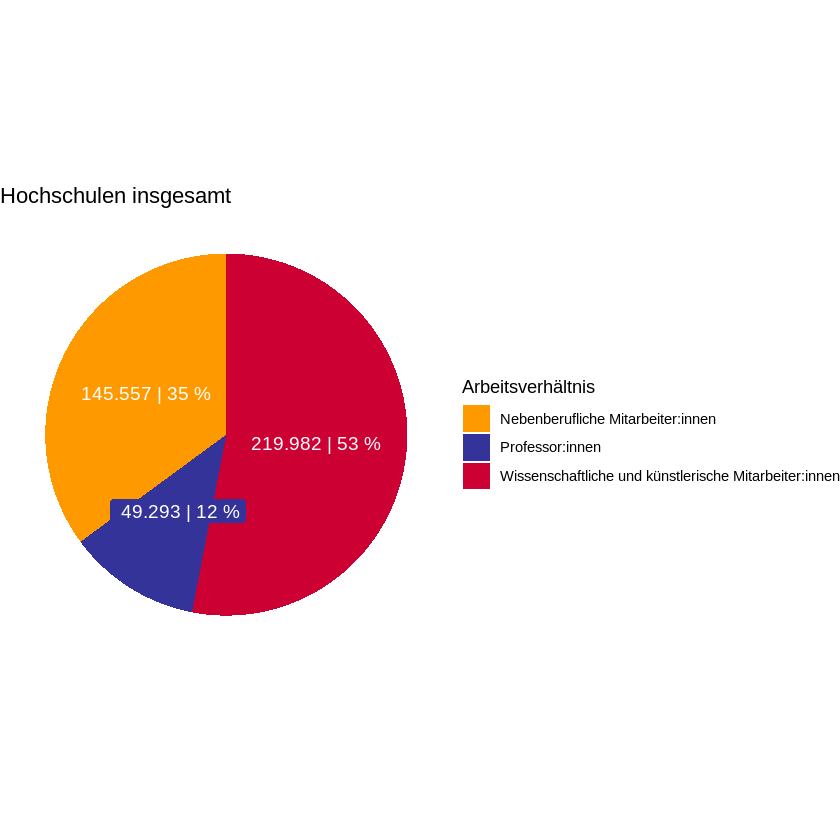

In [119]:
ggplot(Daten_kreisdiagramm, aes(x="", y=Absolute_Werte, fill=Arbeitsverhältnis))+ #Setzen der Datenbasis
  geom_bar(stat="identity")+ #Setzen wie die Werte verarbeitet werden sollen
  coord_polar("y")+ #Zusatz für Kreisdiagramme
  theme_void()+ #Hintergrund wird weiß eingefärbt
  scale_fill_manual(values = c("#FF9900", "#333399", "#CC0033"))+ #Farben für einzelne Diagrammteile setzen. Farbcodes sind online abrufbar.
  ggtitle("Hochschulen insgesamt")+ #Überschrift setzen
  geom_label(aes(label=Werte_kombiniert), #Beschriftung setzen
             position = position_stack(vjust = 0.5), #Position der Beschriftung setzen
             color="white", #Schriftfarbe setzen
             label.size = 0, #Größe des Randes um Beschriftung setzen
             size=4, #Schriftgröße setzen
             show.legend = FALSE) #Beschriftung soll nicht in der Legende angezeigt werden

![](https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/_images/pie_with_R.png)  
*Abbildung 10: Nachgbautes Kreisdiagramm mit R*

Voilà, Sie haben soeben das Kreisdiagramm nachgebaut!

#### Fazit
Betrachten Sie nun das originale Diagramm aus dem Bildungsbericht und das von Ihnen selbstständig erzeugte im Vergleich:

![](https://github.com/SchenbergZY/Tabelle-Fallstudie-1/blob/main/notebook/_images/Pie_vergleich.png?raw=1)  
*Abbildung 11: vergleich nachgebautes vs. originales Kreisdiagramm*

Bis auf kleine Schönheitsfehler fällt im direkten Vergleich kein Unterschied auf.

**Das Kreisdiagramm ist somit mittels der Primärquelle reproduzierbar!**
